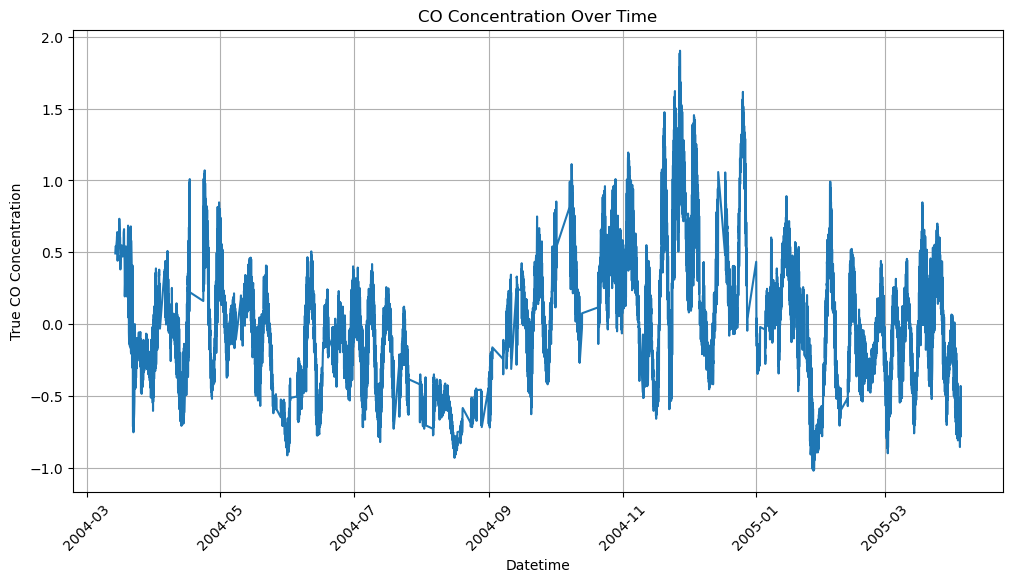

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

consumer_data = pd.read_csv('C:/airqual-project/air-quality-Kafka-pipeline/consumed_air_quality_data.csv')
consumer_data['Datetime'] = pd.to_datetime(consumer_data['Datetime'])
consumer_data.set_index('Datetime', inplace=True)

# Plot CO concentration
plt.figure(figsize=(12, 6))
consumer_data['co_gt_smoothed'] = consumer_data['co_gt'].rolling(window=24).mean()
sns.lineplot(data=consumer_data, x=consumer_data.index, y='co_gt_smoothed')
plt.title('CO Concentration Over Time')
plt.xlabel('Datetime')
plt.ylabel('True CO Concentration')
plt.xticks(rotation=45)
plt.grid()
plt.show()

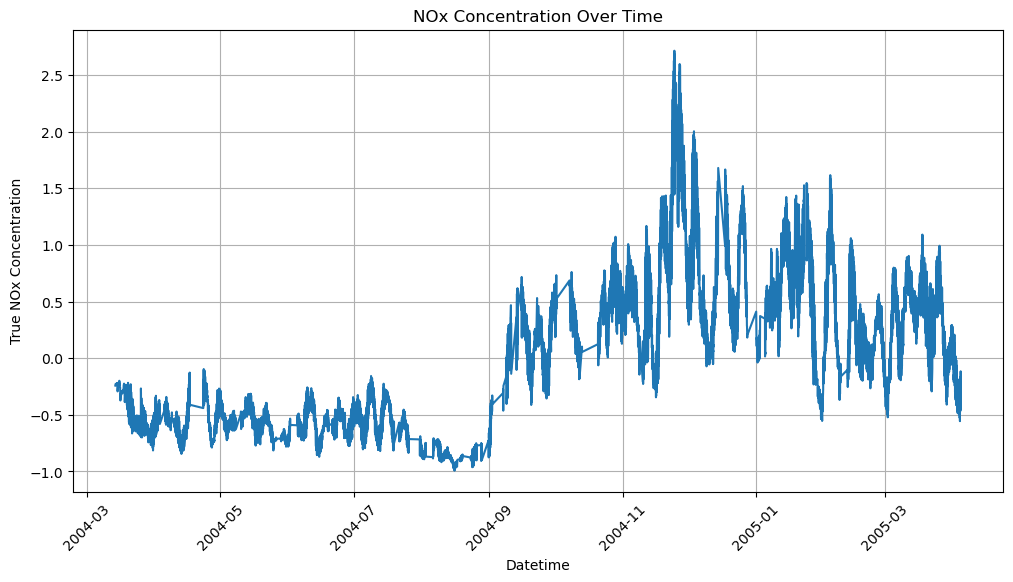

In [16]:
# Plot NOx concentration
plt.figure(figsize=(12, 6))
consumer_data['nox_gt_smoothed'] = consumer_data['nox_gt'].rolling(window=24).mean()
sns.lineplot(data=consumer_data, x=consumer_data.index, y='nox_gt_smoothed')
plt.title('NOx Concentration Over Time')
plt.xlabel('Datetime')
plt.ylabel('True NOx Concentration')
plt.xticks(rotation=45)
plt.grid()
plt.show()

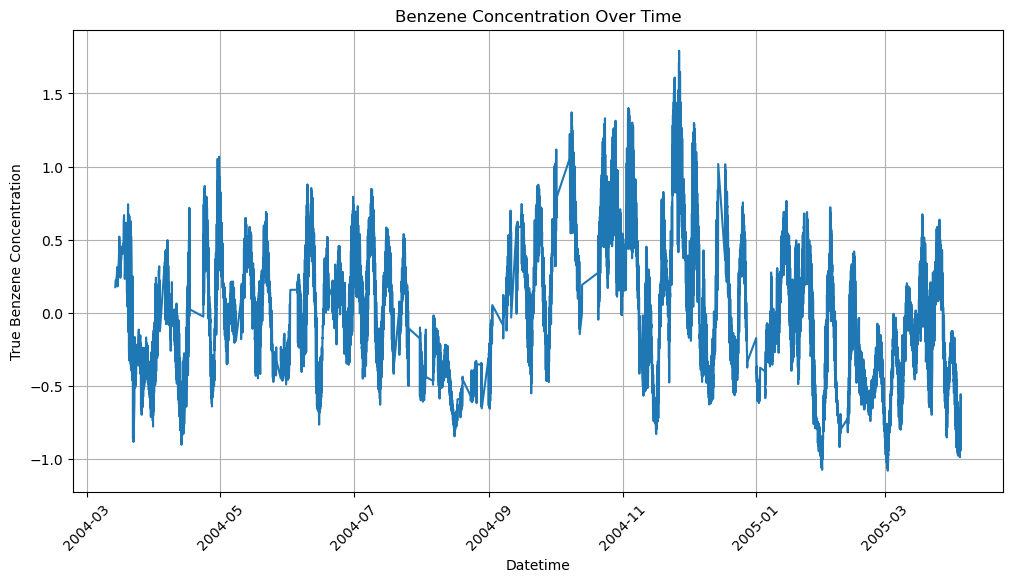

In [17]:
# Plot Benzene concentration
plt.figure(figsize=(12, 6))
consumer_data['c6h6_gt_smoothed'] = consumer_data['c6h6_gt'].rolling(window=24).mean()
sns.lineplot(data=consumer_data, x=consumer_data.index, y='c6h6_gt_smoothed')
plt.title('Benzene Concentration Over Time')
plt.xlabel('Datetime')
plt.ylabel('True Benzene Concentration')
plt.xticks(rotation=45)
plt.grid()
plt.show()

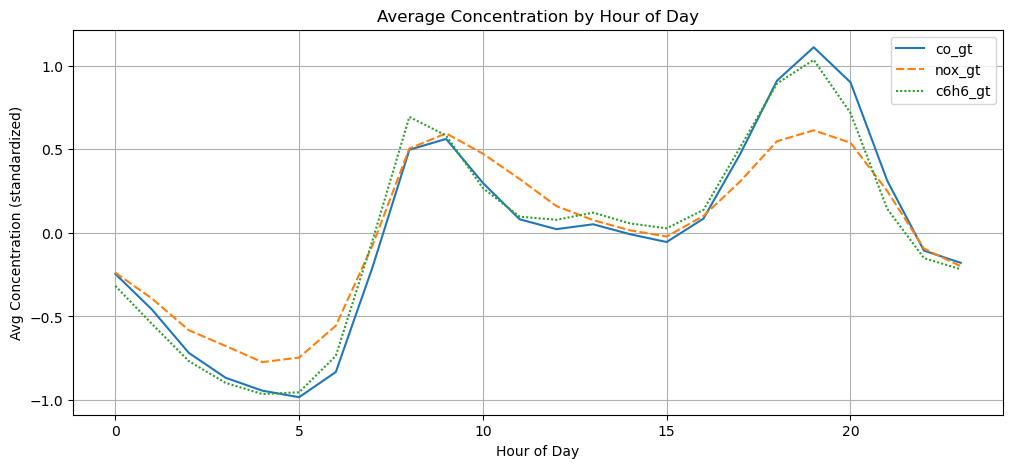

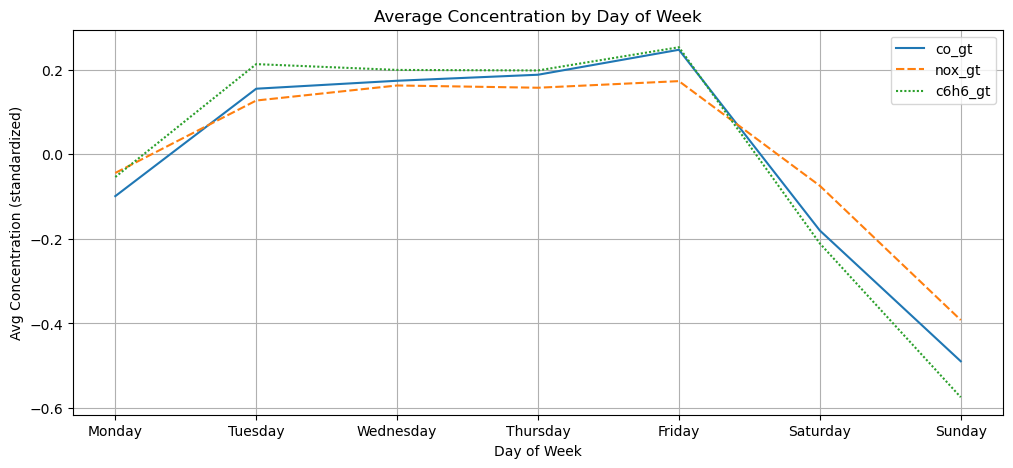

In [3]:
# Plot daily & weekly patterns 

# Extract hour and day
consumer_data['hour'] = consumer_data.index.hour
consumer_data['day_name'] = consumer_data.index.day_name()

# Average by hour of day
hourly_avg = consumer_data.groupby('hour')[['co_gt', 'nox_gt', 'c6h6_gt']].mean()

plt.figure(figsize=(12, 5))
sns.lineplot(data=hourly_avg)
plt.title('Average Concentration by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Concentration (standardized)')
plt.grid()
plt.show()

# Average by day of week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_avg = consumer_data.groupby('day_name')[['co_gt', 'nox_gt', 'c6h6_gt']].mean().reindex(ordered_days)

plt.figure(figsize=(12, 5))
sns.lineplot(data=weekly_avg)
plt.title('Average Concentration by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Avg Concentration (standardized)')
plt.grid()
plt.show()

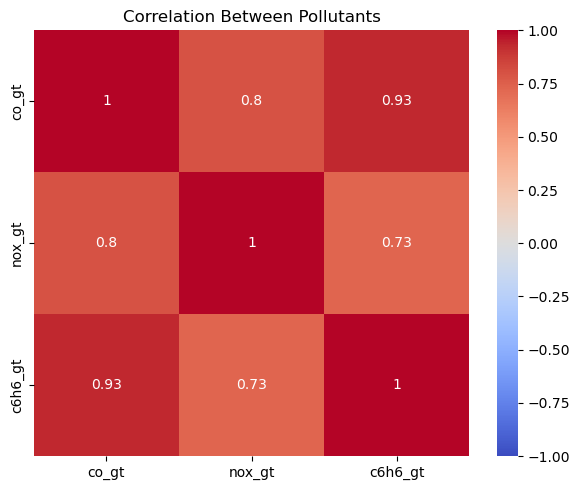

In [4]:
# Compute correlation matrix
pollutant_cols = ['co_gt', 'nox_gt', 'c6h6_gt']
corr_matrix = consumer_data[pollutant_cols].corr()

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Pollutants')
plt.tight_layout()
plt.show()

In [ ]:
# Examining temperature & humidity as potential predictors
import statsmodels.api as sm
from statsmodels.formula.api import ols

fit = ols('co_gt ~ t + rh', data=consumer_data).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  co_gt   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     24.25
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           3.18e-11
Time:                        14:36:43   Log-Likelihood:                -10174.
No. Observations:                7195   AIC:                         2.035e+04
Df Residuals:                    7192   BIC:                         2.037e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0082      0.012     -0.697      0.486      -0.031       0.015
t              0.0829      0.014      5.920      0.000       0.055       0.110
rh             0.0890      0.014      6.339      0.000       0.062       0.117
==============================================================================
Omnibus:                     1746.449   Durbin-Watson:                   0.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4225.486
Skew:                           1.343   Prob(JB):                         0.00
Kurtosis:                       5.624   Cond. No.                         1.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""